importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

importing the datasets

In [2]:
exercise_data = pd.read_csv('exercise.csv')
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [3]:
calories_data = pd.read_csv('calories.csv')
calories_data.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


combine the datasets

In [4]:
data = pd.concat([exercise_data,calories_data['Calories']], axis=1)
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


check if there is missing data

In [5]:
data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

show the dataset information

In [6]:
data.shape

(15000, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


encodig categorical data

In [8]:
data = pd.get_dummies(data , columns=['Gender'] , drop_first=True , prefix='C')
data.head()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,C_male
0,14733363,68,190.0,94.0,29.0,105.0,40.8,231.0,True
1,14861698,20,166.0,60.0,14.0,94.0,40.3,66.0,False
2,11179863,69,179.0,79.0,5.0,88.0,38.7,26.0,True
3,16180408,34,179.0,71.0,13.0,100.0,40.5,71.0,False
4,17771927,27,154.0,58.0,10.0,81.0,39.8,35.0,False


selecting features

In [9]:
data = data.drop(columns='User_ID' , axis=1)
data.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,C_male
0,68,190.0,94.0,29.0,105.0,40.8,231.0,True
1,20,166.0,60.0,14.0,94.0,40.3,66.0,False
2,69,179.0,79.0,5.0,88.0,38.7,26.0,True
3,34,179.0,71.0,13.0,100.0,40.5,71.0,False
4,27,154.0,58.0,10.0,81.0,39.8,35.0,False


Getting data information

In [10]:
data.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


removing outliers

In [11]:
higher_cut_off = data['Height'].quantile(0.99)
lower_cut_off = data['Height'].quantile(0.01)
mask = ((data['Height'] < higher_cut_off) & (data['Height'] > lower_cut_off))
data = data[mask]

In [12]:
higher_cut_off = data['Heart_Rate'].quantile(0.99)
mask = data['Heart_Rate'] < higher_cut_off
data = data[mask]

In [13]:
lower_cut_off = data['Body_Temp'].quantile(0.05)
mask = data['Body_Temp'] > lower_cut_off
data = data[mask]

Ensuring that there is no more outliers

In [14]:
data.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,13691.000000,13691.000000,13691.000000,13691.000000,13691.000000,13691.000000,13691.000000
mean,42.827770,174.452706,74.891023,16.101673,95.938427,40.123534,91.999781
std,16.998397,13.431748,14.338395,7.820141,8.920397,0.638036,59.227815
min,20.000000,145.000000,42.000000,1.000000,67.000000,38.500000,2.000000
25%,28.000000,164.000000,63.000000,9.000000,89.000000,39.700000,41.000000
50%,40.000000,175.000000,74.000000,16.000000,96.000000,40.300000,83.000000
75%,56.000000,185.000000,86.000000,23.000000,103.000000,40.600000,138.000000
max,79.000000,204.000000,115.000000,30.000000,114.000000,41.500000,276.000000


In [15]:
X = data.drop(columns=['Calories'] , axis=1).values
print(X)
X.shape

[[68 190.0 94.0 ... 105.0 40.8 True]
 [20 166.0 60.0 ... 94.0 40.3 False]
 [69 179.0 79.0 ... 88.0 38.7 True]
 ...
 [27 165.0 65.0 ... 85.0 39.2 False]
 [43 159.0 58.0 ... 90.0 40.1 False]
 [63 173.0 79.0 ... 92.0 40.5 True]]


(13691, 7)

In [16]:
y = data['Calories'].values
print(y)
y.shape

[231.  66.  26. ...  23.  75.  98.]


(13691,)

In [17]:
features = data.drop(columns='Calories' , axis=1)

# Number of features
num_features = features.shape[1]

# Feature names
feature_names = features.columns.tolist()

# Dimension of features
feature_dimension = features.shape

# Print the results
print("Number of Features:", num_features)
print("Feature Names:", feature_names)
print("Feature Dimension:", feature_dimension)


Number of Features: 7
Feature Names: ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'C_male']
Feature Dimension: (13691, 7)


Splitting the dataset into the Training set and Test set

In [18]:
X_train_test, X_test, y_train_test, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_test, y_train_test, test_size=0.25, random_state=42)

feature scaling

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

Training the Linear Regression model on the Training set

In [20]:
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [21]:
# Cross-validation
n_folds = 5
cv_scores = cross_val_score(regressor, X_train_scaled, y_train, cv=n_folds, scoring='r2')
print(f"Cross-Validation Scores (n={n_folds}):", cv_scores)
print("Mean R2 Score:", np.mean(cv_scores))

Cross-Validation Scores (n=5): [0.96835119 0.96522196 0.96609952 0.96792835 0.96629169]
Mean R2 Score: 0.9667785417995285


predicting and validating the valdation set results

In [22]:
# Predicting the validation set results
y_val_pred = regressor.predict(X_val_scaled)

In [23]:
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error

In [24]:
# Validating the model on the validation set
print("R-squared on Validation Set:", r2_score(y_val, y_val_pred))
print("Mean Absolute Error on Validation Set:", mean_absolute_error(y_val, y_val_pred))
print("Mean Squared Error on Validation Set:", mean_squared_error(y_val, y_val_pred))

R-squared on Validation Set: 0.9668050080936934
Mean Absolute Error on Validation Set: 7.926005267517254
Mean Squared Error on Validation Set: 116.4982232111868


predicting and validating the test set results

In [25]:
y_test_pred = regressor.predict(X_test_scaled)

In [26]:
np.set_printoptions(precision=2)
print(np.concatenate((y_test_pred .reshape(len(y_test_pred ),1), y_test.reshape(len(y_test),1)),1))

[[ 16.1   27.  ]
 [156.19 184.  ]
 [179.6  180.  ]
 ...
 [  4.52  26.  ]
 [ 21.98  32.  ]
 [ 99.76 100.  ]]


In [27]:
# Displaying the results
print("Predicted vs Actual on Test Set:\n", np.concatenate((y_test_pred.reshape(len(y_test_pred), 1), y_test.reshape(len(y_test), 1)), axis=1))
print("R2 Score on Test Set:", r2_score(y_test, y_test_pred))
print("Mean Absolute Error on Test Set:", mean_absolute_error(y_test, y_test_pred))
print("Mean Squared Error on Test Set:", mean_squared_error(y_test, y_test_pred))

Predicted vs Actual on Test Set:
 [[ 16.1   27.  ]
 [156.19 184.  ]
 [179.6  180.  ]
 ...
 [  4.52  26.  ]
 [ 21.98  32.  ]
 [ 99.76 100.  ]]
R2 Score on Test Set: 0.9667211027750766
Mean Absolute Error on Test Set: 7.831613182735626
Mean Squared Error on Test Set: 115.20270541727534


In [28]:
regressor_score_train = regressor.score(X_train_scaled, y_train)
print("Model Score on Training Set:", regressor_score_train)

Model Score on Training Set: 0.966873801698139


visualising the results

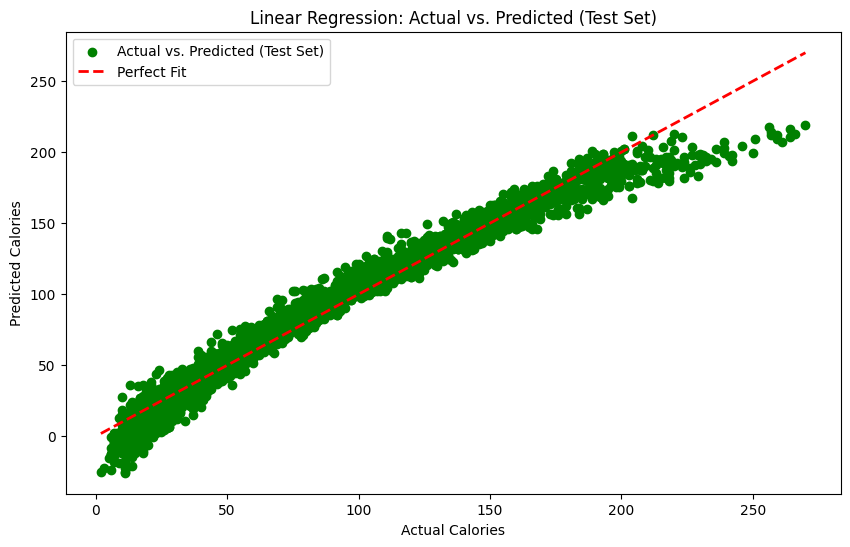

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='green', label='Actual vs. Predicted (Test Set)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Fit')
plt.title('Linear Regression: Actual vs. Predicted (Test Set)')
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.legend()
plt.show()